## 1. Price Elasticity of Demand

Price elasticity of demand (**PED**) is a measure representing the quantity demanded to the change in the price of a product or service. To simplify, it is the ratio of percentage change in quantity demanded of a product in response to the percent change in its price.

<div>
<img src="./img/elasticity_formula.png" width="500"/>
</div>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet("data/df.parquet")

In [3]:
df["year"]

0          2017
1          2017
2          2017
3          2018
4          2018
           ... 
1329764    2020
1329765    2020
1329766    2020
1329767    2020
1329768    2020
Name: year, Length: 1329080, dtype: int64

Following data preprocessing selected is for the 2017, 2018, 2019 and 2020 years, on a weekly basis.

Mean price and number of purchases count per week

In [4]:
df["year_week"] = df["year"].astype(str) + "_" + df["week"].astype(str)

In [5]:
df.head()

,item_key,date,shop_key,sales_count,item_price_final,item_price_regular,item_price_special,main_category,sub_category,brnd,item_page_views,week,month,year,dayofweek,is_sale,discount,pct_bracket,year_week
0,160069753483773,2017-11-17,4,1,370.993,370.993,NaN,im7,sc33,b24,NaN,46,11,2017,4,0,0.0,No discount,2017_46
1,160069753483773,2017-11-21,4,1,370.993,370.993,NaN,im7,sc33,b24,NaN,47,11,2017,1,0,0.0,No discount,2017_47
2,160069753483773,2017-12-31,4,1,370.993,370.993,NaN,im7,sc33,b24,NaN,52,12,2017,6,0,0.0,No discount,2017_52
3,160069753483773,2018-04-19,1,1,349.993,349.993,NaN,im7,sc33,b24,NaN,16,4,2018,3,0,0.0,No discount,2018_16
4,160069753483773,2018-04-22,1,1,349.993,349.993,NaN,im7,sc33,b24,43.0,16,4,2018,6,0,0.0,No discount,2018_16


In [6]:
df.date.nunique()

1126

In [7]:
df.year_week.nunique()

162

In [8]:
df_cat = df.groupby(['year_week','main_category']).agg({'item_price_final':'mean','sales_count': 'sum'}).reset_index()

In [9]:
df_cat

,year_week,main_category,item_price_final,sales_count
0,2017_46,im11,12.895700,2
1,2017_46,im14,65.563429,21
2,2017_46,im15,387.493150,2
3,2017_46,im16,444.705429,9
4,2017_46,im17,124.858556,14
...,...,...,...,...
2716,2020_9,im5,181.290086,762
2717,2020_9,im6,132.698101,4020
2718,2020_9,im7,292.742769,586
2719,2020_9,im8,174.088768,707


In [10]:
x_pivot = df_cat.pivot(index= 'year_week' , columns='main_category' ,values='item_price_final')

x_values = pd.DataFrame(x_pivot.to_records())
x_values.head()

,year_week,im1,im11,im12,im14,im15,im16,im17,im19,im2,im20,im3,im4,im5,im6,im7,im8,im9
0,2017_46,NaN,12.895700,NaN,65.563429,387.493150,444.705429,124.858556,114.292600,41.994400,279.448730,254.791950,20.205300,220.292150,147.710450,264.158833,217.322867,37.938500
1,2017_47,NaN,29.483815,36.242467,82.672339,185.613747,452.798523,139.256736,78.801337,113.615133,254.049619,348.182441,50.231590,221.444342,130.160353,329.576460,185.033268,95.276425
2,2017_48,NaN,10.575400,57.287433,63.346145,131.001900,351.911208,179.514095,60.921029,48.226800,239.591730,461.031890,54.216700,216.623733,131.865289,277.708589,153.512782,NaN
3,2017_49,NaN,31.820467,70.767625,62.416561,186.482420,443.548910,156.420906,75.328762,67.426533,179.199160,290.689660,49.621020,239.445667,143.338127,298.263124,191.491115,76.093750
4,2017_50,475.9881,62.193350,56.005957,71.241510,147.933470,545.073050,177.024411,87.172740,79.736590,217.996142,584.719729,33.219567,167.396483,133.690453,315.865742,226.459100,44.991350


In [11]:
y_pivot = df_cat.pivot( index = 'year_week',columns='main_category', values='sales_count')
y_values = pd.DataFrame(y_pivot.to_records())
y_values.head()

,year_week,im1,im11,im12,im14,im15,im16,im17,im19,im2,im20,im3,im4,im5,im6,im7,im8,im9
0,2017_46,NaN,2.0,NaN,21.0,2.0,9.0,14.0,2.0,2.0,25.0,4.0,1.0,2.0,22.0,10.0,3.0,1.0
1,2017_47,NaN,33.0,10.0,217.0,18.0,69.0,51.0,22.0,16.0,127.0,25.0,13.0,37.0,336.0,54.0,35.0,4.0
2,2017_48,NaN,1.0,14.0,62.0,16.0,29.0,29.0,7.0,3.0,77.0,10.0,3.0,22.0,130.0,19.0,26.0,NaN
3,2017_49,NaN,6.0,5.0,111.0,12.0,21.0,22.0,11.0,7.0,70.0,5.0,8.0,21.0,177.0,26.0,22.0,2.0
4,2017_50,1.0,4.0,7.0,101.0,13.0,24.0,12.0,6.0,10.0,68.0,7.0,3.0,24.0,179.0,12.0,8.0,2.0


### 1.1 Linear Regression Model

In [12]:
points = []
results_values = {
    "main_category": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
    "rsquared_value" : [],
}
#Append x_values with y_values per same main_category
for column in x_values.columns[1:]:
    
    print(f"\nCategory - {column}\n")
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df_col = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])

    
    #Linear Regression Model
    x_value = df_col['x_value']
    y_value = df_col['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()    
    
    #(Null Hypothesis test) Coefficient with a p value less than 0.05
    if result.f_pvalue < 0.05:

        rsquared = result.rsquared
        coefficient_pvalue = result.f_pvalue
        intercept, slope = result.params
        mean_price = np.mean(x_value)
        mean_quantity = np.mean(y_value)
        tintercept, t_score = result.tvalues
        
        print(result.summary())

        #Price elasticity Formula
        price_elasticity = (slope)*(mean_price/mean_quantity)    

        #Append results into dictionary for dataframe
        results_values["main_category"].append(column)
        results_values["price_elasticity"].append(price_elasticity)
        results_values["price_mean"].append(mean_price)
        results_values["quantity_mean"].append(mean_quantity)
        results_values["intercept"].append(intercept)
        results_values['t_score'].append(t_score)
        results_values["slope"].append(slope)
        results_values["coefficient_pvalue"].append(coefficient_pvalue)
        results_values["rsquared_value"].append(rsquared)
        
    else:
        print("Accept Null Hypothesis test")

final_df = pd.DataFrame.from_dict(results_values)
df_elasticity = final_df[['main_category','price_elasticity',
                          't_score','coefficient_pvalue',
                          'slope','price_mean','quantity_mean',
                          'intercept','rsquared_value']]


Category - im1

                            OLS Regression Results                            
Dep. Variable:                y_value   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     8.456
Date:                Sun, 29 Jan 2023   Prob (F-statistic):            0.00423
Time:                        18:40:49   Log-Likelihood:                -541.29
No. Observations:                 142   AIC:                             1087.
Df Residuals:                     140   BIC:                             1092.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.5879      4.699   

In [13]:
df_elasticity

,main_category,price_elasticity,t_score,coefficient_pvalue,slope,price_mean,quantity_mean,intercept,rsquared_value
0,im1,-0.882002,-2.907892,4.232714e-03,-0.065143,205.666165,15.190141,28.587869,0.056959
1,im12,-1.450806,-9.102902,4.674423e-16,-0.774865,150.820196,80.551948,197.417201,0.352814
2,im14,-4.065139,-12.249568,9.307408e-25,-167.702091,63.786543,2631.432099,13328.568729,0.483957
3,im15,-0.794975,-4.738822,4.716312e-06,-3.883860,129.676680,633.537037,1137.183093,0.123078
4,im16,2.945384,5.090797,9.909834e-07,6.781831,416.260022,958.450617,-1864.554669,0.139397
5,im20,-1.648286,-2.007668,4.636171e-02,-13.246468,237.348146,1907.450617,5051.475156,0.024573
6,im3,-0.984859,-2.161950,3.210802e-02,-1.131035,356.634817,409.567901,812.934461,0.028384
7,im4,-0.980505,-3.820125,1.909113e-04,-2.828552,54.845327,158.217391,313.350275,0.084066
8,im5,-2.025965,-4.127940,5.876291e-05,-8.113608,182.778643,731.993827,2214.988055,0.096249
9,im6,-4.229187,-4.844803,2.971827e-06,-121.613061,127.245149,3659.018519,19133.690516,0.127933


In [14]:
df_elasticity.main_category.unique()

array(['im1', 'im12', 'im14', 'im15', 'im16', 'im20', 'im3', 'im4', 'im5',
       'im6', 'im7', 'im9'], dtype=object)

In [15]:
list(set(df_cat.main_category.unique()) - set(df_elasticity.main_category.unique()))

['im11', 'im19', 'im17', 'im8', 'im2']

### 1.2 Price Elasticity Null Hypothesis Testing

#### **Null hypothesis: Does price change not affect demand?**

We reject the null hypothesis by only calculating the price elasticity of demand slope that counts with a p-value of less than 0.05
Following null hypothesis was rejected. Therefore, we can proceed with the results that is statistically significant proved the relation of impression demand with price changes

For the categories - `im2`,`im8`, `im11`, `im17`, `im19` we accept the Null Hypothesis

In [16]:
print("Null Hypothesis Rejected:", len(df_elasticity), "out of", len(set(df_cat['main_category'])) )

Null Hypothesis Rejected: 12 out of 17


### 1.3 Price Elasticity Results

In the dataframe below, we can check that our t-score is above 1.96 or below -1.96, in addition to the p-value of less than 0.05. As a result, we can validate our alternative hypothesis which is

Are price changes influencing our demand?

In [17]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =True, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['main_category'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['main_category'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['main_category'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('main_category', inplace=True)
    display(df)

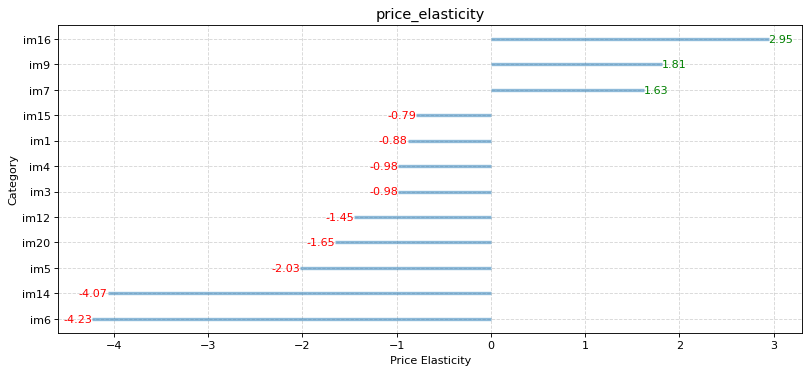

,ranking,price_elasticity
main_category,,
im6,1,-4.229187
im14,2,-4.065139
im5,3,-2.025965
im20,4,-1.648286
im12,5,-1.450806
im3,6,-0.984859
im4,7,-0.980505
im1,8,-0.882002
im15,9,-0.794975


In [18]:
pe_plot = divergent_plot(df_elasticity, 'price_elasticity', 'Category', 'Price Elasticity')

### 1.3.1 Price Elasticity Conclusion

Demand is said to be elastic when demand has a higher proportionate response to a smaller change in price. On the other hand, demand is inelastic when there is little movement in demand with a significant difference in price.

We can analyze in the results that the largest price elasticies are:

- `im6`: PED of -4.23. In other words: a 10% price increase in `im6`, it decreases demand by **42.3%**
      
- `im16`: PED of 2.95. In other words: a 10% price increase in `im16`, it increases demand by **29.5%**
    
**Additional Information to take into consideration:**

In the growth phase of the product life cycle, the product will tend to be fairly inelastic. This is because of the nature of the demand. People buying at this stage will tend to be 'innovators' and they are prepared to take risks with new products and are willing to pay a high price to have the latest technology.

However, as the product moves towards maturity, the elasticity will increase. The amount of competition will increase and the increasing number of substitutes will make consumers more price sensitive. The nature of the consumers will also change and they are likely to be more motivated to buy by factors like price, functionality and reliability.

## 2. Cross - Price Elasticity

Cross-price elasticity help the marketer to know the naturality of main competitors related to price, which it help to analyze the sensitivity of one price against other competitors prices. As for instance, does our product impression demand increase, if our direct competitor Y increases their prices on the same or similar electronic products within a certain timeframe?

<div>
<img src="./img/cross_price.jpg" width="500"/>
</div>

### 2.1 Cross - Price Elasticity Matrix Function (Multi Linear Regression)
In following function:

Multiple dataframes with x values features of the entire sample of category within their prices of 2017, 2018, 2019 and 2020 and a dependent variable that reflect the demand of each respective category for the analysis were iterrated for coefficient matrix.

Coefficient (slope) values that reflect the change in competitors price divided by the change in respective product quantity and obtained a p-value of less than .05 were labelled as no effect due that the null hypothesis cannot be rejected

In [19]:
def crossprice_(df_x, df_y, column_name):
    import statsmodels.api as sm
    
    #grab all X_values
    new_df = df_x.copy()
    #grab y_value with same column name
    new_df['y_value-' + column_name] = df_y[column_name]
    
    multi_xvalues = new_df.loc[:, new_df.columns[1:-1]]
    multi_yvalue = new_df.loc[:, new_df.columns[-1]]
    
    #get price mean values per product
    mean_xvalues = np.mean(multi_xvalues)
    #get mean quantity for y value
    mean_yvalue = np.mean(multi_yvalue)
    
    # Multilinear regression
    X = sm.add_constant(multi_xvalues)
    model = sm.OLS(multi_yvalue, X, missing='drop')
    result = model.fit()
    
    #get results
    results_summary = result.summary()
    #get pvalues of each coefficient
    pvalue = result.pvalues
    
    #transform summary result to a table
    results_as_html = results_summary.tables[1].as_html()
    new_dataframe = pd.read_html(results_as_html, header=0, index_col=0)[0]
    
    #add p value to the table
    new_dataframe['p_value']= pvalue
    
    #set product namain_categoryme as index
    new_dataframe.index.name = 'main_category'
    new_dataframe.reset_index()
    
    #get each product name price mean
    new_dataframe['mean'] = mean_xvalues
    # execute cross-price formula
    new_dataframe['price_elasticity'] = (new_dataframe.coef) * (new_dataframe['mean'] / mean_yvalue)

    new_dataframe = new_dataframe.reset_index()
    pvalue_significant = new_dataframe['p_value']
    
    #Chech null hypothesis for coefficient or slope value per product
    new_dataframe[column_name+'_CPE'] = np.where((pvalue_significant > .05), 'No effect', new_dataframe['price_elasticity'])
    new_dataframe = new_dataframe.dropna()
    
    return new_dataframe[['main_category', column_name + '_CPE']]

In [20]:
x_values.columns[1:]

Index(['im1', 'im11', 'im12', 'im14', 'im15', 'im16', 'im17', 'im19', 'im2', 'im20', 'im3', 'im4', 'im5', 'im6', 'im7', 'im8', 'im9'], dtype='object')

In [21]:
result_df = pd.DataFrame()
for column in x_values.columns[1:]:
    result_df[['main_category', column + '_CPE']] = crossprice_(x_values, y_values, column)
    result_df = result_df.dropna()
    result_df[column+'_CPE'] = pd.to_numeric(result_df[column+'_CPE'], errors='coerce').fillna(0)

In [22]:
result_df = result_df.set_index('main_category')

In [23]:
result_df.head()

,im1_CPE,im11_CPE,im12_CPE,im14_CPE,im15_CPE,im16_CPE,im17_CPE,im19_CPE,im2_CPE,im20_CPE,im3_CPE,im4_CPE,im5_CPE,im6_CPE,im7_CPE,im8_CPE,im9_CPE
main_category,,,,,,,,,,,,,,,,,
im1,-0.871941,-0.761570,-0.849709,-0.730116,-0.455718,-0.573213,-0.572681,-0.693460,-0.783620,-0.596852,-0.540368,-0.621090,-0.591913,-0.594411,-0.468474,-0.738144,0.0
im11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
im12,-0.768491,-0.801435,-1.476149,-0.547116,-0.474836,-0.438573,-0.429513,-0.755072,-0.442096,-0.534293,0.000000,-0.920646,-0.523837,-0.568147,-0.479859,0.000000,0.0
im14,-3.499619,-2.363110,-4.095781,-4.775800,-4.976650,-3.293312,-4.390304,-2.383576,-3.736959,-3.469630,-3.270500,-3.616888,-4.488972,-3.047850,-2.285778,-2.965870,0.0
im15,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


### 2.2 Cross - Price Elasticity `im16` Case
As an example, we analyze cross-price elasticity for `im16` category, which it would provide following conclusions:

- if other categories change their prices, what it would happen to category `im16` demand?

In [24]:
x_values.columns[1:]

Index(['im1', 'im11', 'im12', 'im14', 'im15', 'im16', 'im17', 'im19', 'im2', 'im20', 'im3', 'im4', 'im5', 'im6', 'im7', 'im8', 'im9'], dtype='object')

In [25]:
result_df.nlargest(3,result_df.columns[5])

,im1_CPE,im11_CPE,im12_CPE,im14_CPE,im15_CPE,im16_CPE,im17_CPE,im19_CPE,im2_CPE,im20_CPE,im3_CPE,im4_CPE,im5_CPE,im6_CPE,im7_CPE,im8_CPE,im9_CPE
main_category,,,,,,,,,,,,,,,,,
im7,0.0,0.0,0.0,0.0,1.674811,2.006703,1.829216,1.895336,1.778045,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
im2,0.0,0.0,0.0,0.0,0.000000,1.816383,1.529003,0.000000,0.000000,1.694816,0.0,0.0,0.0,0.0,1.765244,0.0,0.0
im11,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [26]:
test_largest = result_df.nlargest(3,result_df.columns[5])[[result_df.columns[5]]]
test_smallest = result_df.nsmallest(3,result_df.columns[5])[[result_df.columns[5]]]
frames = [test_smallest, test_largest]

result = pd.concat(frames).reset_index()

In [27]:
result

,main_category,im16_CPE
0,im6,-5.250935
1,im14,-3.293312
2,im1,-0.573213
3,im7,2.006703
4,im2,1.816383
5,im11,0.000000


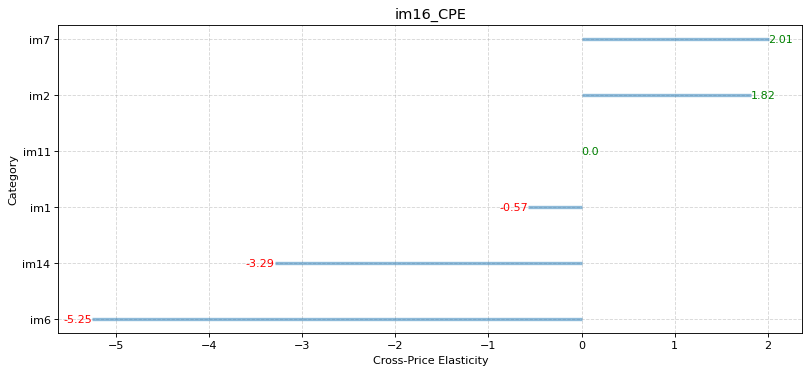

,ranking,im16_CPE
main_category,,
im6,1,-5.250935
im14,2,-3.293312
im1,3,-0.573213
im11,4,0.000000
im2,5,1.816383
im7,6,2.006703


In [28]:
im2 = divergent_plot(result, result.columns[1], 'Category', 'Cross-Price Elasticity' )

### 2.2.1 Cross - Price Elasticity `im16` Conclusion
Regarding negative cross-price elasticities, it means that these categories are complements not substitutes. In other words from our sample data, we can analyze that when prices of categories `im6`, `im14`, `im1` goes up that means that our demand in `im16` decreases.

- As for instance an increase of 10% in `im6` price, it will decreases our demand by **52.51%**

Regarding positive cross-price elasticities, it means that these categories are substitutes (main competitors). In other words from our sample data, we can analyze that the main competitors of the category `im16` are `im7` and `im2`.

- As for instance, if `im7` increases their price by 10%, our demand would tend to increase up to **20%**

As a conclusion, cross-price elasticities would help the marketer to measure price sensitivity in comparison with other categories and will help to know the naturality of competition(substitutes) and the naturality of complementation regarding pricing strategies

Having a base price we can optimize the price for next days/weeks using the following formula:

In [29]:
def calculate_revenue(price, elasticity):
    return price * (1 - elasticity * price)